# # importing all the required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#making a dataframe and loading the data to it
df = pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Pre-Processing Data Analysis (count of missing/ null values, redundant columns, etc.)

In [3]:
# we will first find the NA values in the dataset
# there is no NA value in the dataset
df.isnull().values.any()

False

In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
# Statistics of the dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Creating dummies 
convert categorical into numerical data

In [6]:
# Now in order to prepare the data for the machine learning models
# we will have to drop some columns which are not really needed
# in this case, we will drop job, contact, day, month, poutcome, education, job

df1 = df.drop(['marital','contact','day','month','poutcome','education','job'], axis = 1)
df1.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,no,2143,yes,no,261,1,-1,0,no
1,44,no,29,yes,no,151,1,-1,0,no
2,33,no,2,yes,yes,76,1,-1,0,no
3,47,no,1506,yes,no,92,1,-1,0,no
4,33,no,1,no,no,198,1,-1,0,no


In [7]:
# now we will do the one hot encoding, we will convert the categorical data into numerical data
# we will do one by one in order to keep it simple
#The default column have yes/no, we will convert it into (0 = no) and (1 = yes)

default = df1.default.map(dict(yes=1, no=0))
Final = pd.concat([df1.drop('default',axis = 1),default], axis = 1)
Final

,age,balance,housing,loan,duration,campaign,pdays,previous,y,default
0,58,2143,yes,no,261,1,-1,0,no,0
1,44,29,yes,no,151,1,-1,0,no,0
2,33,2,yes,yes,76,1,-1,0,no,0
3,47,1506,yes,no,92,1,-1,0,no,0
4,33,1,no,no,198,1,-1,0,no,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,825,no,no,977,3,-1,0,yes,0
45207,71,1729,no,no,456,2,-1,0,yes,0
45208,72,5715,no,no,1127,5,184,3,yes,0
45209,57,668,no,no,508,4,-1,0,no,0


In [8]:
# The Housing column also have Yes/No, we will do the same process as we have done with the default column

housing = Final.housing.map(dict(yes=1, no=0))
Final = pd.concat([Final.drop('housing',axis = 1),housing], axis = 1)
Final

,age,balance,loan,duration,campaign,pdays,previous,y,default,housing
0,58,2143,no,261,1,-1,0,no,0,1
1,44,29,no,151,1,-1,0,no,0,1
2,33,2,yes,76,1,-1,0,no,0,1
3,47,1506,no,92,1,-1,0,no,0,1
4,33,1,no,198,1,-1,0,no,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,825,no,977,3,-1,0,yes,0,0
45207,71,1729,no,456,2,-1,0,yes,0,0
45208,72,5715,no,1127,5,184,3,yes,0,0
45209,57,668,no,508,4,-1,0,no,0,0


In [9]:
# The Loan column also have Yes/No, we will do the same process as we have done with the default column

loan = Final.loan.map(dict(yes=1, no=0))
Final = pd.concat([Final.drop('loan',axis = 1),loan], axis = 1)
Final

,age,balance,duration,campaign,pdays,previous,y,default,housing,loan
0,58,2143,261,1,-1,0,no,0,1,0
1,44,29,151,1,-1,0,no,0,1,0
2,33,2,76,1,-1,0,no,0,1,1
3,47,1506,92,1,-1,0,no,0,1,0
4,33,1,198,1,-1,0,no,0,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,yes,0,0,0
45207,71,1729,456,2,-1,0,yes,0,0,0
45208,72,5715,1127,5,184,3,yes,0,0,0
45209,57,668,508,4,-1,0,no,0,0,0


In [10]:
# The y column also have Yes/No, we will do the same process as we have done with the default column

dependent = Final.y.map(dict(yes=1, no=0))
Final = pd.concat([Final.drop('y',axis = 1),dependent], axis = 1)
Final

,age,balance,duration,campaign,pdays,previous,default,housing,loan,y
0,58,2143,261,1,-1,0,0,1,0,0
1,44,29,151,1,-1,0,0,1,0,0
2,33,2,76,1,-1,0,0,1,1,0
3,47,1506,92,1,-1,0,0,1,0,0
4,33,1,198,1,-1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,0,0,0,1
45207,71,1729,456,2,-1,0,0,0,0,1
45208,72,5715,1127,5,184,3,0,0,0,1
45209,57,668,508,4,-1,0,0,0,0,0


               age   balance  duration  campaign     pdays  previous  \
age       1.000000  0.097783 -0.004648  0.004760 -0.023758  0.001288   
balance   0.097783  1.000000  0.021560 -0.014578  0.003435  0.016674   
duration -0.004648  0.021560  1.000000 -0.084570 -0.001565  0.001203   
campaign  0.004760 -0.014578 -0.084570  1.000000 -0.088628 -0.032855   
pdays    -0.023758  0.003435 -0.001565 -0.088628  1.000000  0.454820   
previous  0.001288  0.016674  0.001203 -0.032855  0.454820  1.000000   
default  -0.017879 -0.066745 -0.010021  0.016822 -0.029979 -0.018329   
housing  -0.185513 -0.068768  0.005075 -0.023599  0.124178  0.037076   
loan     -0.015655 -0.084350 -0.012412  0.009980 -0.022754 -0.011043   
y         0.025155  0.052838  0.394521 -0.073172  0.103621  0.093236   

           default   housing      loan         y  
age      -0.017879 -0.185513 -0.015655  0.025155  
balance  -0.066745 -0.068768 -0.084350  0.052838  
duration -0.010021  0.005075 -0.012412  0.394521  
cam

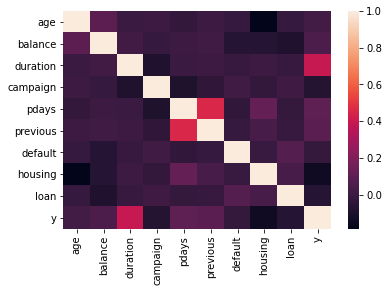

In [11]:
import seaborn as sns
corr = Final.corr();
print(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()

In [12]:
# Now we will go for dependent and independent variables
# Dependent variable "Y"

y = Final.y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [13]:
# Independent variable "X"

x = Final.drop('y',axis = 1)
x.head()

,age,balance,duration,campaign,pdays,previous,default,housing,loan
0,58,2143,261,1,-1,0,0,1,0
1,44,29,151,1,-1,0,0,1,0
2,33,2,76,1,-1,0,0,1,1
3,47,1506,92,1,-1,0,0,1,0
4,33,1,198,1,-1,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [15]:
X_train.head()

,age,balance,duration,campaign,pdays,previous,default,housing,loan
12096,51,2685,78,2,-1,0,0,0,0
42511,28,1705,412,2,-1,0,0,0,0
2731,57,7,65,6,-1,0,0,1,0
29474,34,2467,368,1,-1,0,0,0,0
2569,53,592,151,1,-1,0,0,1,0


In [16]:
X_test.head()

,age,balance,duration,campaign,pdays,previous,default,housing,loan
28011,50,1458,92,1,-1,0,0,0,0
42021,65,11240,149,1,-1,0,0,1,0
41714,25,1185,290,1,114,1,0,0,0
4532,34,371,77,1,-1,0,0,0,0
14977,38,0,264,5,-1,0,0,1,0


In [17]:
y_train.head()

12096    0
42511    1
2731     0
29474    0
2569     0
Name: y, dtype: int64

In [18]:
y_test.head()

28011    0
42021    0
41714    1
4532     0
14977    0
Name: y, dtype: int64

In [19]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression()
Model.fit(X_train, y_train)

LinearRegression()

In [20]:
X_test.head()

,age,balance,duration,campaign,pdays,previous,default,housing,loan
28011,50,1458,92,1,-1,0,0,0,0
42021,65,11240,149,1,-1,0,0,1,0
41714,25,1185,290,1,114,1,0,0,0
4532,34,371,77,1,-1,0,0,0,0
14977,38,0,264,5,-1,0,0,1,0


In [21]:
Model.predict(X_test)

array([0.08882112, 0.04521405, 0.22600337, ..., 0.13781303, 0.00381834,
       0.07244684])

In [22]:
Model.score(X_test,y_test)

0.2211125301413589

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [25]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
X_test.head()

,age,balance,duration,campaign,pdays,previous,default,housing,loan
28011,50,1458,92,1,-1,0,0,0,0
42021,65,11240,149,1,-1,0,0,1,0
41714,25,1185,290,1,114,1,0,0,0
4532,34,371,77,1,-1,0,0,0,0
14977,38,0,264,5,-1,0,0,1,0


In [27]:
y_predicted = model.predict(X_test)

In [34]:
model.predict([[80,3000,140,5,2,1,1,1,0]])

array([0], dtype=int64)

In [29]:
model.predict_proba(X_test)

array([[0.91070852, 0.08929148],
       [0.98132382, 0.01867618],
       [0.59484789, 0.40515211],
       ...,
       [0.92722239, 0.07277761],
       [0.96565339, 0.03434661],
       [0.87640633, 0.12359367]])

In [37]:
from sklearn import metrics
print("Accuracy is   :   ")
print(metrics.accuracy_score(y_test,y_predicted))

Accuracy is   :   
0.885891198584697


In [38]:
model.score(X_test,y_test)

0.885891198584697